In [1]:
# Import des librairies nécessaires
import requests
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Récupération des données depuis l'API Raydium
def get_all_pools_data():
    url = "https://api.raydium.io/pairs"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Erreur lors de l'appel à l'API Raydium.")
        return []

print("Chargement des données...")
raw_data = get_all_pools_data()
df = pd.DataFrame(raw_data)

# Nettoyage et conversion des colonnes numériques
df["tvl"] = pd.to_numeric(df.get("liquidity", None), errors="coerce")
df["price"] = pd.to_numeric(df.get("price", None), errors="coerce")
df["volume24h"] = pd.to_numeric(df.get("volume24h", None), errors="coerce")

Chargement des données...


📊 Graphique 1 – Top 10 pools par TVL


,name,tvl,price
348641,SLERF/WSOL,4.704005e+07,4.952592e-04
441054,MEW/WSOL,3.399457e+07,2.318023e-05
555143,smole/WSOL,2.997706e+07,2.213010e-07
208583,BOME/WSOL,2.983576e+07,1.305176e-05
281886,WSOL/Fartcoin,2.586523e+07,1.202628e+02
172721,$WIF/WSOL,1.575490e+07,6.310707e-03
562395,WSOL/USDC,1.356529e+07,1.749394e+02
127889,POPCAT/WSOL,1.325998e+07,2.748159e-03
129451,$NAP/WSOL,1.107125e+07,2.225277e-08
600200,WSOL/Pnut,1.004594e+07,5.291682e+02


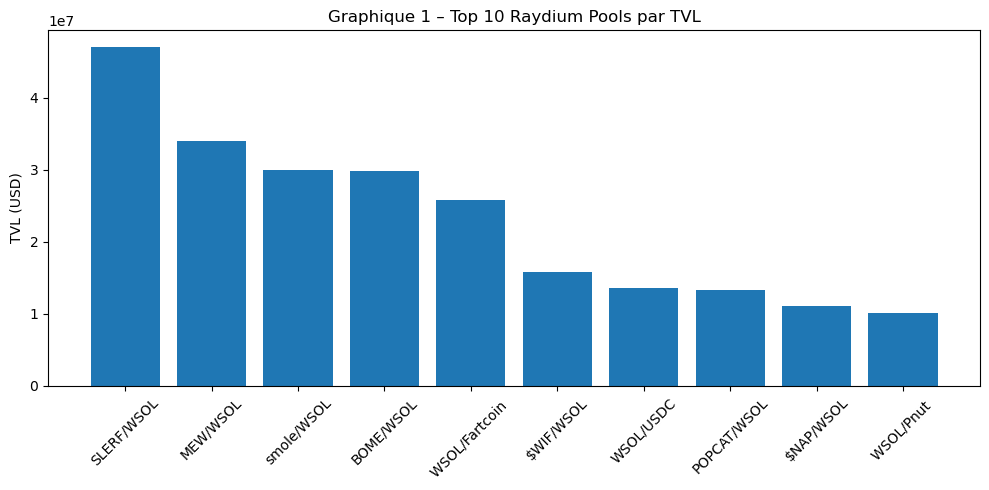

In [2]:
# Top 10 des pools par valeur totale déposée (TVL)
top_tvl = df.sort_values(by="tvl", ascending=False).head(10)

print("📊 Graphique 1 – Top 10 pools par TVL")
display(top_tvl[["name", "tvl", "price"]])

plt.figure(figsize=(10, 5))
plt.bar(top_tvl["name"], top_tvl["tvl"])
plt.xticks(rotation=45)
plt.ylabel("TVL (USD)")
plt.title("Graphique 1 – Top 10 Raydium Pools par TVL")
plt.tight_layout()
plt.show()

📊 Graphique 2 – Paires avec le prix token le plus élevé


,name,price,tvl
659766,WSOL/BULLANA,3.193043e+25,0.000002
208411,WSOL/GRAV,2.499934e+25,0.000001
96833,WSOL/Goku,1.250000e+25,0.000003
647942,WSOL/BGME,1.048493e+25,0.000003
120421,WSOL/GNUTS,2.495495e+24,0.000001
470261,WSOL/BRICK,2.500000e+22,0.000007
195628,WSOL/LONG,1.511233e+22,0.002205
10326,WSOL/KINGU,8.064483e+21,0.000043
39637,WSOL/WLFI,2.798593e+21,0.000026
144331,WSOL/Socks,1.878528e+21,0.000186


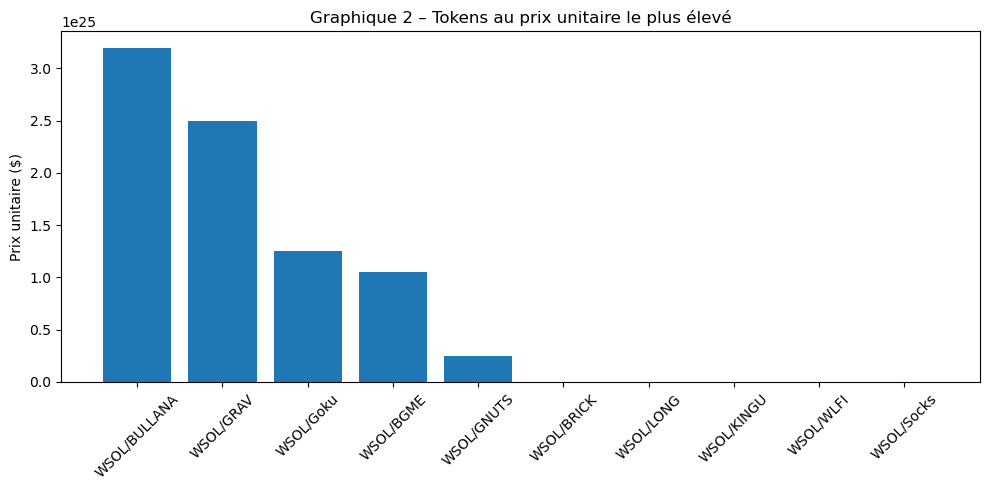

In [3]:
# Top 10 des pools avec tokens à prix unitaire élevé
top_prices = df.sort_values(by="price", ascending=False).head(10)

print("📊 Graphique 2 – Paires avec le prix token le plus élevé")
display(top_prices[["name", "price", "tvl"]])

plt.figure(figsize=(10, 5))
plt.bar(top_prices["name"], top_prices["price"])
plt.xticks(rotation=45)
plt.ylabel("Prix unitaire ($)")
plt.title("Graphique 2 – Tokens au prix unitaire le plus élevé")
plt.tight_layout()
plt.show()

📊 Graphique 3 – Tokens populaires à bas prix (TVL > 1M & prix < 0.01)


,name,tvl,price
348641,SLERF/WSOL,4.704005e+07,4.952592e-04
441054,MEW/WSOL,3.399457e+07,2.318023e-05
555143,smole/WSOL,2.997706e+07,2.213010e-07
208583,BOME/WSOL,2.983576e+07,1.305176e-05
172721,$WIF/WSOL,1.575490e+07,6.310707e-03
127889,POPCAT/WSOL,1.325998e+07,2.748159e-03
129451,$NAP/WSOL,1.107125e+07,2.225277e-08
123754,LIKE/WSOL,8.975043e+06,2.596910e-06
681461,MANEKI/WSOL,8.147976e+06,1.005996e-05
447729,PUNDU/WSOL,7.279812e+06,2.299802e-05


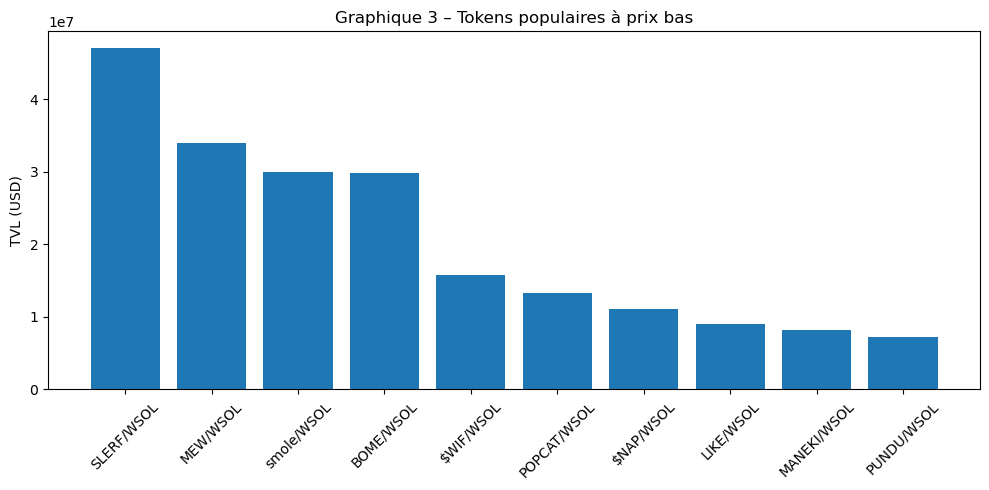

In [4]:
# Tokens ayant une TVL significative et un prix unitaire très bas
filtered_low_price = df[
    (df["tvl"] > 1_000_000) & 
    (df["price"] < 0.01)
].sort_values(by="tvl", ascending=False).head(10)

print("📊 Graphique 3 – Tokens populaires à bas prix (TVL > 1M & prix < 0.01)")
display(filtered_low_price[["name", "tvl", "price"]])

plt.figure(figsize=(10, 5))
plt.bar(filtered_low_price["name"], filtered_low_price["tvl"])
plt.xticks(rotation=45)
plt.ylabel("TVL (USD)")
plt.title("Graphique 3 – Tokens populaires à prix bas")
plt.tight_layout()
plt.show()